In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [32]:
import netCDF4 as nc
import numpy as np
import os
import pyproj

## AGASEA

In [46]:
data_dir = "/Users/lindzey/RadarData/ANTARCTIC/UTIG"
data_filepath = os.path.join(data_dir, "AGASEA", "Y05a", "Y05a_1.nc")

In [6]:
data = nc.Dataset(data_filepath, 'r')

In [7]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Instrument: HiCARS
    Flight Transect: Y05a
    dimensions(sizes): along-track sample(3091), range sample(3200)
    variables(dimensions): float64 latitude(along-track sample), float64 longitude(along-track sample), float64 elevation(along-track sample), float64 fast-time(range sample), float64 data_hi_gain(along-track sample, range sample), float64 data_lo_gain(along-track sample, range sample)
    groups: 

In [9]:
data.variables.keys()

dict_keys(['latitude', 'longitude', 'elevation', 'fast-time', 'data_hi_gain', 'data_lo_gain'])

In [33]:
lon = data.variables['longitude'][:].data
lat = data.variables['latitude'][:].data
radargram = data.variables['data_hi_gain'][:].data
radargram = np.log(radargram)

In [21]:
ps71 = pyproj.Proj('epsg:3031')
xx, yy = ps71(lon, lat)

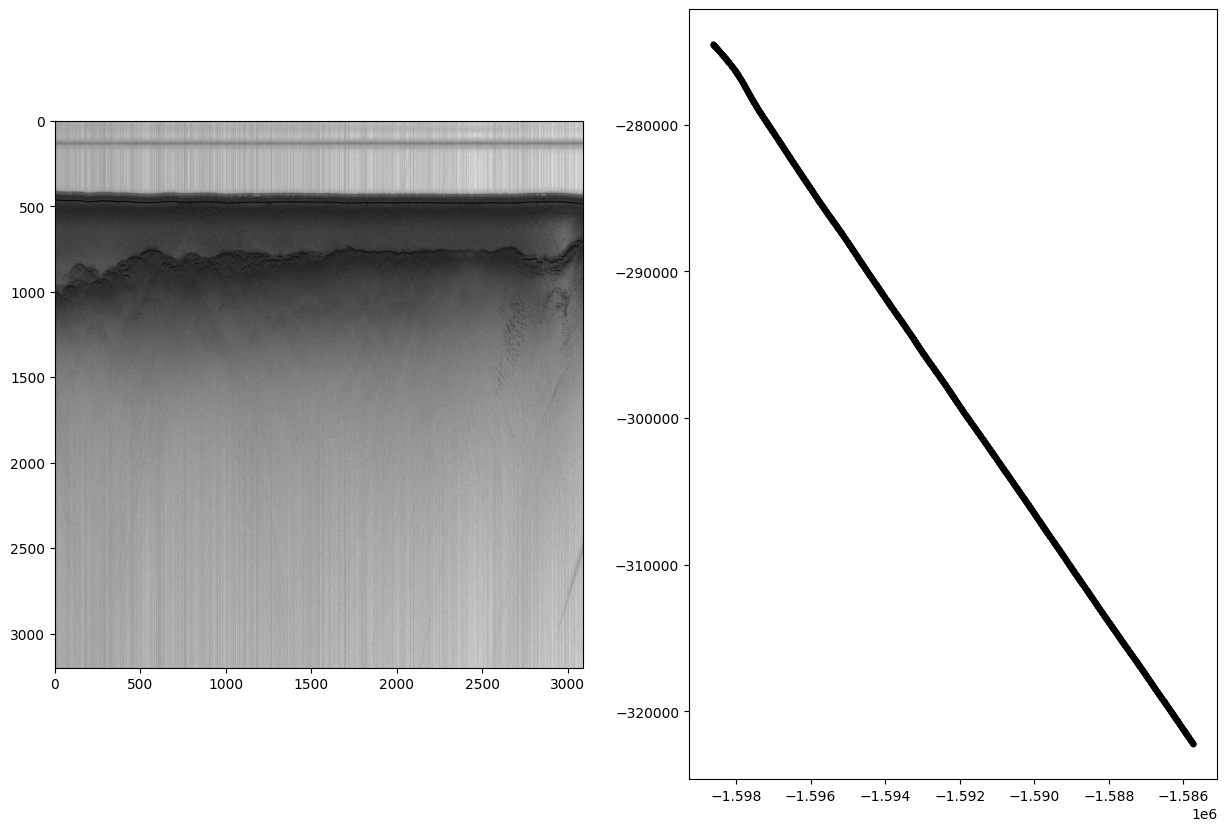

In [34]:
fig = plt.figure(figsize=(15, 10))
ax1, ax2, = fig.subplots(1,2)

ax1.imshow(radargram.transpose(), cmap='gray_r')
ax2.plot(xx, yy, 'k.')

#### What are the files in the Results directory?

In [47]:
results_filepath = os.path.join(data_dir, "AGASEA", "Results", "b13_results.nc")
print(os.path.isfile(results_filepath))

True


In [43]:
res = nc.Dataset(results_filepath, 'r')


In [44]:
res

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Instrument: PASIN
    Flight Transect: b13
    dimensions(sizes): along-track sample(18027)
    variables(dimensions): float64 latitude(along-track sample), float64 longitude(along-track sample), float64 radar_height(along-track sample), float64 ice_thickness(along-track sample), float64 reflectivity(along-track sample), float64 reflectivity_unc(along-track sample), float64 atten_rate(along-track sample), float64 atten_unc(along-track sample)
    groups: 

Drat. Looks like that's just the profile datasets, but they're not in a format that's easy to plot srf/bed picks on the radaragrams themselves. 

In [45]:
res.variables['ice_thickness'][:].data

array([2396.7, 2396.2, 2395.6, ..., 1832.9, 1759.5, 1760.5])

## EAGLE
#### Now on to the netCDFs for Eagle, released via AAD

In [48]:
eagle_filepath = os.path.join(data_dir, "EAGLE", "2015_AN_UTIG.ER2HI1B", "ER2HI1B_2016021_PEL_JKB2n_Y14a_004.nc")
os.path.isfile(eagle_filepath)

True

In [49]:
data = nc.Dataset(eagle_filepath, 'r')

In [50]:
data.variables.keys()

dict_keys(['time', 'fasttime', 'lat', 'lon', 'altitude', 'pitch', 'roll', 'heading', 'amplitude_low_gain', 'amplitude_high_gain'])

In [55]:
data.variables['altitude']

<class 'netCDF4._netCDF4.Variable'>
float32 altitude(time)
    standard_name: height
    units: meters
    positive: up
    long_name: Altitude of antenna above nominal sea level (WGS84)
unlimited dimensions: time
current shape = (4000,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [56]:
lon = data.variables['lon'][:].data
lat = data.variables['lat'][:].data
radargram = data.variables['amplitude_high_gain'][:].data
#radargram = np.log(radargram)

In [57]:
ps71 = pyproj.Proj('epsg:3031')
xx, yy = ps71(lon, lat)

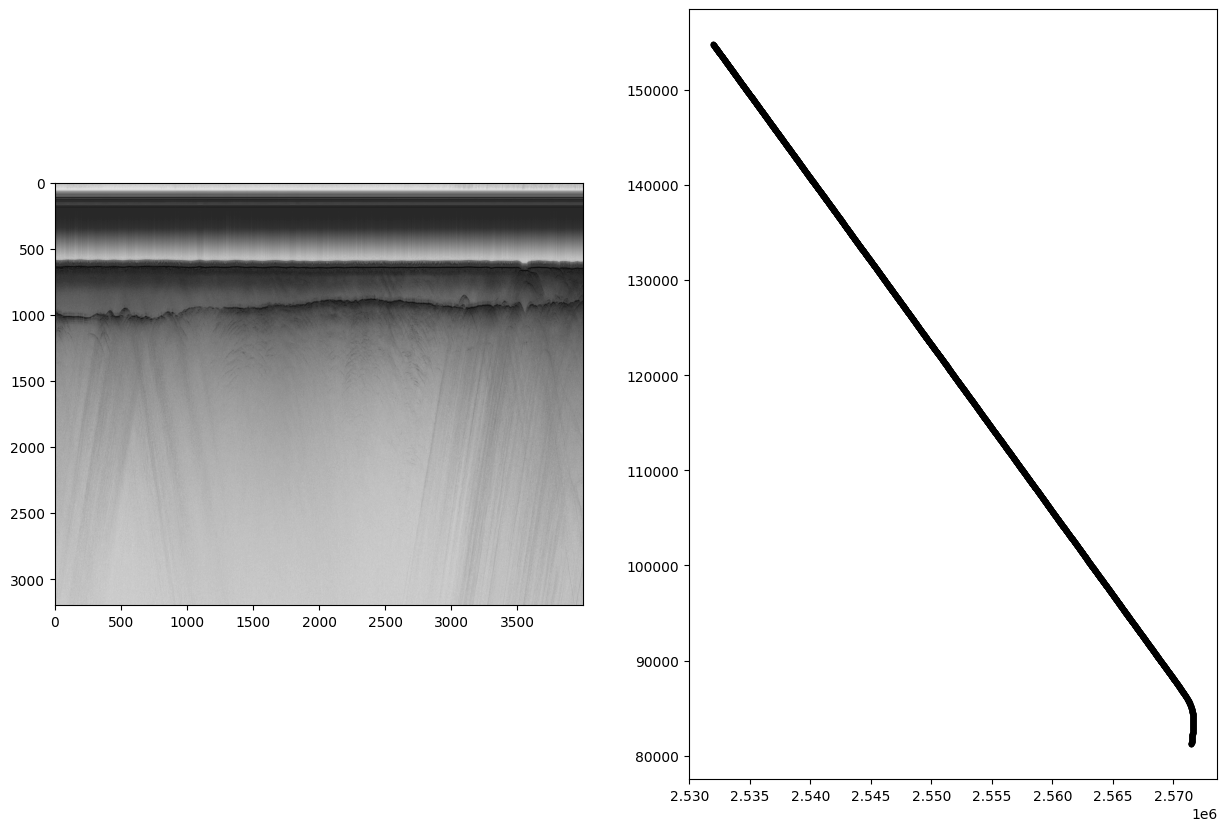

In [58]:
fig = plt.figure(figsize=(15, 10))
ax1, ax2, = fig.subplots(1,2)

ax1.imshow(radargram.transpose(), cmap='gray_r')
ax2.plot(xx, yy, 'k.')

## Lake Vostok

These radargrams are from USAP-DC